In [9]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
df = pd.read_csv("D:\ml dataset\lung_cancer.csv")

In [10]:
df.describe()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
count,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000,309.000000
mean,0.524272,62.673139,1.563107,1.569579,1.498382,1.501618,1.504854,1.673139,1.556634,1.556634,1.556634,1.579288,1.640777,1.469256,1.556634,0.873786
std,0.500221,8.210301,0.496806,0.495938,0.500808,0.500808,0.500787,0.469827,0.497588,0.497588,0.497588,0.494474,0.480551,0.499863,0.497588,0.332629
min,0.000000,21.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,0.000000,57.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
50%,1.000000,62.000000,2.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,1.000000
75%,1.000000,69.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000
max,1.000000,87.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000


In [11]:
df.head()

,GENDER,AGE,SMOKING,YELLOW_FINGERS,ANXIETY,PEER_PRESSURE,CHRONIC DISEASE,FATIGUE,ALLERGY,WHEEZING,ALCOHOL CONSUMING,COUGHING,SHORTNESS OF BREATH,SWALLOWING DIFFICULTY,CHEST PAIN,LUNG_CANCER
0,1,69,1,2,2,1,1,2,1,2,2,2,2,2,2,1
1,1,74,2,1,1,1,2,2,2,1,1,1,2,2,2,1
2,0,59,1,1,1,2,1,2,1,2,1,2,2,1,2,0
3,1,63,2,2,2,1,1,1,1,1,2,1,1,2,2,0
4,0,63,1,2,1,1,1,1,1,2,1,2,2,1,1,0


1    270
0     39
Name: LUNG_CANCER, dtype: int64


D:\Users\dhany\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


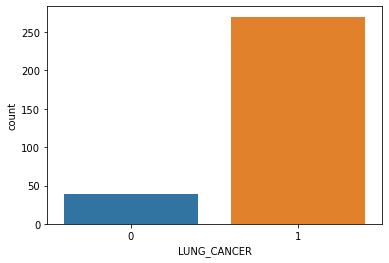

In [12]:
import seaborn as sns
sns.countplot(df['LUNG_CANCER']) 
print(df.LUNG_CANCER.value_counts())  

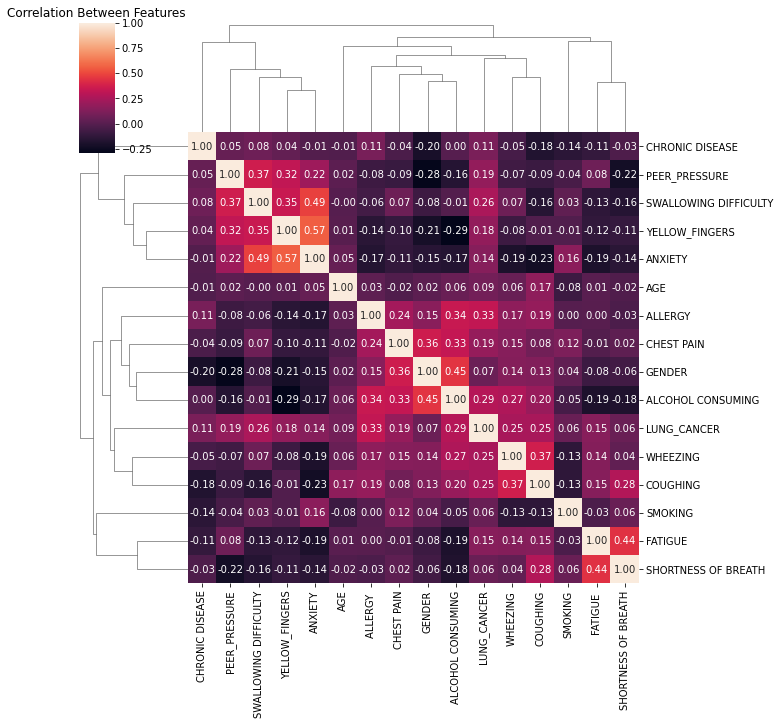

In [13]:
import matplotlib.pyplot as plt
corr_data = df.corr()
sns.clustermap(corr_data,annot= True,fmt = '.2f')
plt.title('Correlation Between Features')
plt.show();

In [18]:
from sklearn.model_selection import train_test_split
target = df["LUNG_CANCER"].values
train = df.drop(["LUNG_CANCER"], axis=1).values
x_train, x_test, y_train, y_test = train_test_split(train, target, test_size=0.3)
                                                    


In [19]:
print("No. of training samples :",len(x_train))
                                                    
print("No. of test samples :",len(x_test))


No. of training samples : 216
No. of test samples : 93


In [20]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.linear_model import LogisticRegression
classifierLR = LogisticRegression()
classifierLR.fit(x_train,y_train)
classifierLR.score(x_test, y_test)
y_preds = classifierLR.predict(x_test)
print("Logistic Regression accuracy score: ",accuracy_score(y_test, y_preds))
# Confusion Matrix
labels=[0,1]
cmx=confusion_matrix(y_test,y_preds, labels)
print("\nNo. of test samples : ",len(x_test))
print("\n Confustion Matrix : \n",cmx)
print("\nPerfomance measures are: \n",classification_report(y_test, y_preds))

Logistic Regression accuracy score:  0.9139784946236559

No. of test samples :  93

 Confustion Matrix : 
 [[ 7  3]
 [ 5 78]]

Perfomance measures are: 
               precision    recall  f1-score   support

           0       0.58      0.70      0.64        10
           1       0.96      0.94      0.95        83

    accuracy                           0.91        93
   macro avg       0.77      0.82      0.79        93
weighted avg       0.92      0.91      0.92        93



D:\Users\dhany\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
D:\Users\dhany\anaconda3\lib\site-packages\sklearn\utils\validation.py:67: FutureWarning: Pass labels=[0, 1] as keyword args. From version 0.25 passing these as positional arguments will result in an error
  warnings.warn("Pass {} as keyword args. From version 0.25 "


In [22]:
print("Labels from test set are :",y_test)
print("\nPredicted labels are :",y_preds)
print("\nProbabilites of prediciton are :\n",np.round(classifierLR.predict_proba(x_test),2))

Labels from test set are : [1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1
 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1]

Predicted labels are : [1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1 1 1 1 0 1 1 1 1 1 0 1 1 1 1 1
 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

Probabilites of prediciton are :
 [[0.03 0.97]
 [0.   1.  ]
 [0.02 0.98]
 [0.81 0.19]
 [0.   1.  ]
 [0.76 0.24]
 [0.04 0.96]
 [0.06 0.94]
 [0.49 0.51]
 [0.35 0.65]
 [0.01 0.99]
 [0.32 0.68]
 [0.01 0.99]
 [0.02 0.98]
 [0.01 0.99]
 [0.76 0.24]
 [0.16 0.84]
 [0.   1.  ]
 [0.25 0.75]
 [0.33 0.67]
 [0.   1.  ]
 [0.   1.  ]
 [0.02 0.98]
 [0.02 0.98]
 [0.04 0.96]
 [0.05 0.95]
 [0.88 0.12]
 [0.37 0.63]
 [0.05 0.95]
 [0.01 0.99]
 [0.01 0.99]
 [0.02 0.98]
 [0.1  0.9 ]
 [0.02 0.98]
 [0.16 0.84]
 [0.03 0.97]
 [0.   1.  ]
 [0.69 0.31]
 [0.01 0.99]
 [0.81 0.19]
 [0.2  0.8 ]
 